<a href="https://colab.research.google.com/github/feniltailor22/Deep_Learning/blob/main/Forecasting_Future_Sales_Using_ARIMA_and_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA and Seasonal ARIMA**

Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [6]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [10]:
df.drop(105,axis=0,inplace=True)

In [11]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


# **Visualize the Data**

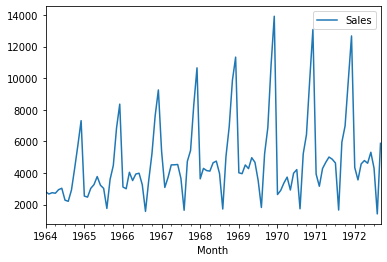

In [17]:
df.plot()

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
adf_test=adfuller(df['Sales'])

In [23]:
print(f'ADF Statistic: {adf_test[0]}')

ADF Statistic: -1.8335930563276228


In [24]:
print(f'p-value: {adf_test[1]}')

p-value: 0.363915771660245


###The p-value is not less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is non-stationary.
###Making the data stationary by Shifting a value by One Step and substracting the output data with original df['y'] to get stationary data

In [26]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [29]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
df

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [28]:
df['Sales'].shift(12)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
               ...  
1972-05-01    5010.0
1972-06-01    4874.0
1972-07-01    4633.0
1972-08-01    1659.0
1972-09-01    5951.0
Name: Sales, Length: 105, dtype: float64

In [31]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [32]:
df

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [37]:
## Again test dickey fuller test
adf_test_seasonal= adfuller(df['Seasonal First Difference'].dropna())

In [38]:
print(f'ADF Statistic: {adf_test_seasonal[0]}')

ADF Statistic: -7.626619157213164


In [39]:
print(f'p-value: {adf_test_seasonal[1]}')

p-value: 2.060579696813685e-11


#The p-value is less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

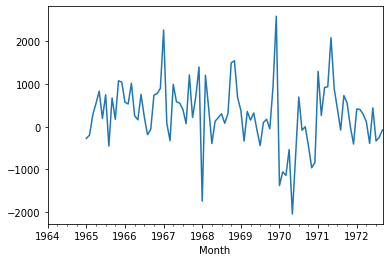

In [40]:
df['Seasonal First Difference'].plot()

# **Auto Regressive Model**

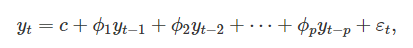

where εt is white noise. This is like a multiple regression but with lagged values of yt as predictors.

In [42]:
from pandas.plotting import autocorrelation_plot

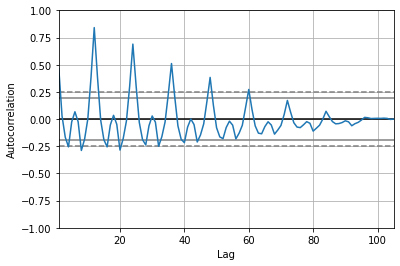

In [43]:
autocorrelation_plot(df['Sales'])

# **Final Thoughts on Autocorrelation(ACF) and Partial Autocorrelation(PACF)**

Identification of an AR (Auto Regressive) model is often best done with the PACF. For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA (Moving Average) model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

Three values are given as an input to ARIMA model:

* p: AR model lags 
* d: differencing
* q: MA lags

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

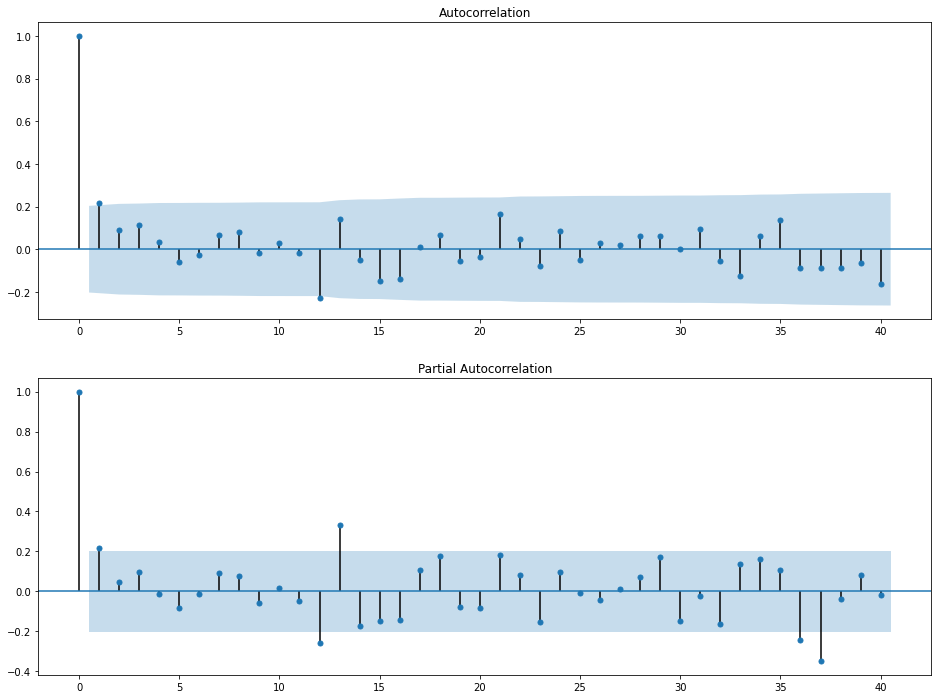

In [47]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [52]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [53]:
# This is seasonal data. Hence, ARIMA will not work well. Just trying ARIMA for seasonal data.

model= ARIMA(endog=df['Sales'], order=(1,1,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [54]:
model_fit= model.fit()

In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 25 Jan 2022   AIC                           1910.251
Time:                        15:50:58   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7848     12.405      1.837      0.069      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

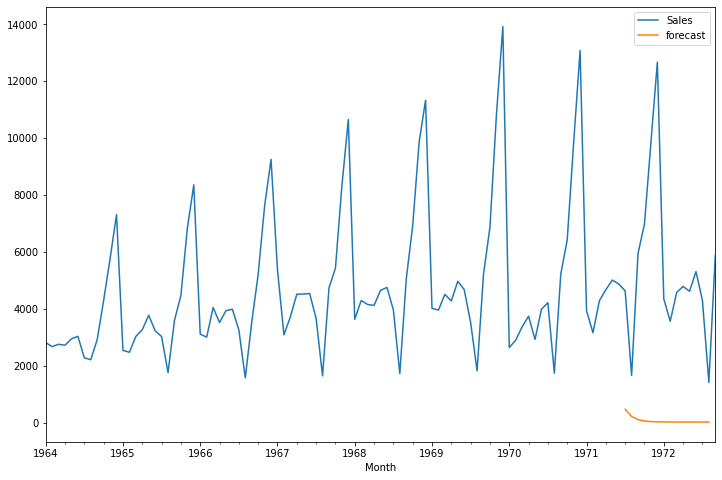

In [56]:
df['forecast']= model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

# **As you can see from the above graph that the forecasting for seasonal data is not accurate by ARIMA model. Thereby, we will use Seasonal ARIMA(SARIMAX)**

In [58]:
from statsmodels import api as sm

In [59]:
model= sm.tsa.statespace.SARIMAX(endog=df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
#seasonal_order: The (P,D,Q,s) order

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [60]:
results=model.fit()

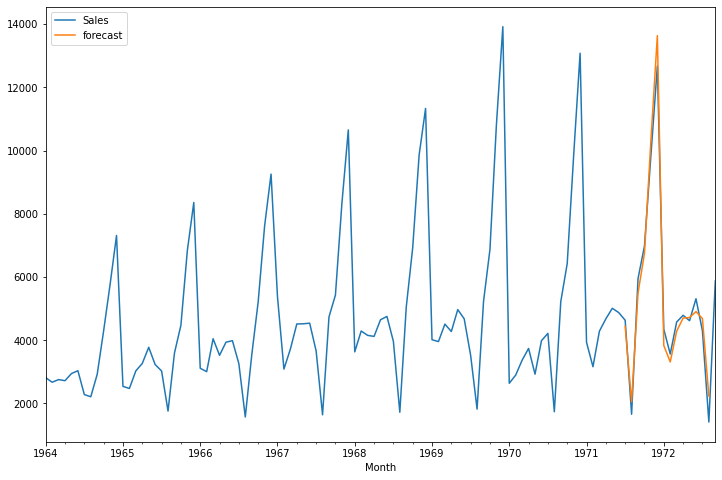

In [61]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [64]:
from pandas.tseries.offsets import DateOffset

In [65]:
make_dates= [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [66]:
make_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [67]:
future_datest_df=pd.DataFrame(index=make_dates[1:],columns=df.columns)

In [68]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [69]:
future_df=pd.concat([df,future_datest_df])

In [70]:
future_df.head()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN


In [71]:
future_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [74]:
future_df['forecast'] = results.predict(start = 104, end = 125, dynamic= True)  

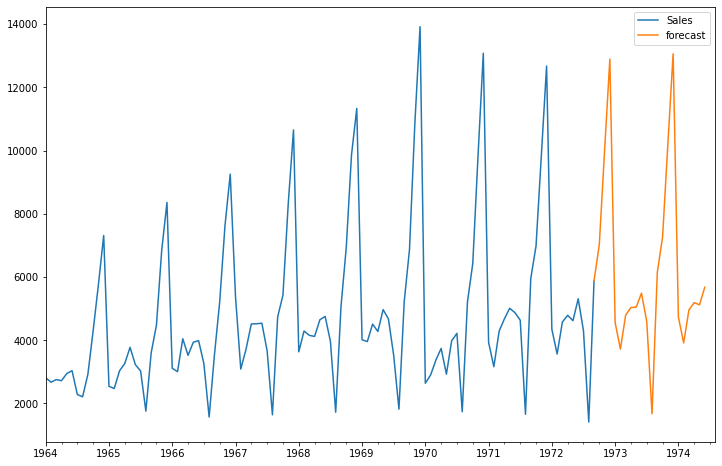

In [75]:
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 